In [3]:
#Import Modules 
%matplotlib notebook
import os 
import csv 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
import gmaps

In [4]:
#Open Wine File 
csv_path = 'Resources/winemag-data.csv'

In [5]:
#Read wine data 
wine_data_pd = pd.read_csv(csv_path)

#Cleaning Data 
clean_data_pd = wine_data_pd.drop(['taster_name', 'taster_twitter_handle'], axis=1)
clean_data_pd =clean_data_pd.dropna(subset=['price', 'region_1','designation','points','price','title','description','variety'])
blended_wines = clean_data_pd.dropna()
blended_wines

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
33,33,US,"Rustic and dry, this has flavors of berries, c...",Puma Springs Vineyard,86,50.0,California,Dry Creek Valley,Sonoma,Envolve 2010 Puma Springs Vineyard Red (Dry Cr...,Red Blend,Envolve
...,...,...,...,...,...,...,...,...,...,...,...,...
129920,129920,US,"Shows the clean, citrus acid juiciness and sil...",Fiddlestix Vineyard,91,48.0,California,Sta. Rita Hills,Central Coast,Pali 2006 Fiddlestix Vineyard Pinot Noir (Sta....,Pinot Noir,Pali
129926,129926,US,This pure Syrah from Reininger's estate vineya...,Ash Hollow Vineyard,91,41.0,Washington,Walla Walla Valley (WA),Columbia Valley,Reininger 2005 Ash Hollow Vineyard Syrah (Wall...,Syrah,Reininger
129945,129945,US,Hailing from one of the more popular vineyards...,Jurassic Park Vineyard Old Vines,90,20.0,California,Santa Ynez Valley,Central Coast,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino
129949,129949,US,There's no bones about the use of oak in this ...,Barrel Fermented,90,35.0,California,Napa Valley,Napa,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs


In [6]:
non_blended = clean_data_pd[clean_data_pd['region_2'].isnull()]
non_blended

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
16,16,Argentina,"Baked plum, molasses, balsamic vinegar and che...",Felix,87,30.0,Other,Cafayate,NaN,Felix Lavaque 2010 Felix Malbec (Cafayate),Malbec,Felix Lavaque
...,...,...,...,...,...,...,...,...,...,...,...,...
129959,129959,France,The granite soil of the Brand Grand Cru vineya...,Brand Grand Cru,90,57.0,Alsace,Alsace,NaN,Cave de Turckheim 2010 Brand Grand Cru Pinot G...,Pinot Gris,Cave de Turckheim
129962,129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,NaN,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano
129965,129965,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,NaN,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser


In [7]:
provinces = clean_data_pd["province"]
countries = clean_data_pd["country"]

In [8]:
# countries for the sections of our pie chart
countries = ["Argentina","Australia","Canada","France","Italy","Spain","US"]

# The values of each section of the pie chart
points = [40, 50, 65, 70, 80, 100, 140]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue","yellow","green","purple"]


explode = (0.1, 0, 0, 0.2, 0, 0, 0)

<IPython.core.display.Javascript object>


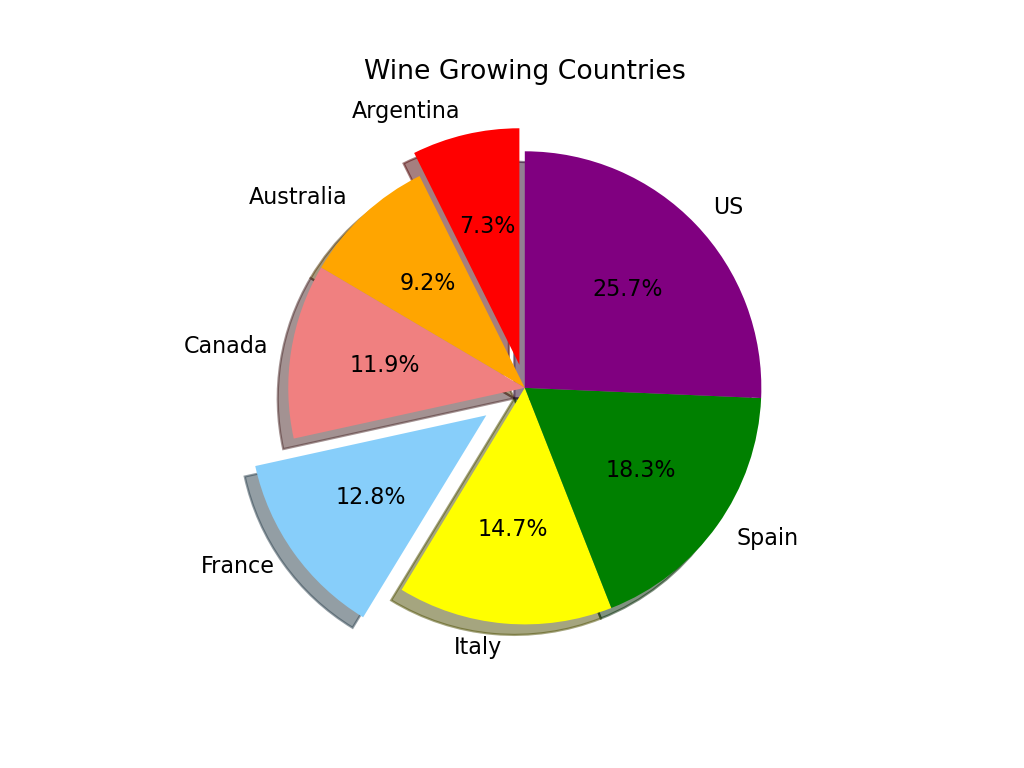

In [9]:
plt.title("Wine Growing Countries")
plt.pie(points, explode=explode, labels=countries, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis=("equal")
plt.show()

In [10]:
clean_data_pd["province"].unique()

array(['Michigan', 'Oregon', 'Northern Spain', 'Sicily & Sardinia',
       'Alsace', 'California', 'Other', 'Mendoza Province', 'Virginia',
       'Southern Italy', 'Beaujolais', 'Bordeaux', 'Central Italy',
       'Washington', 'Champagne', 'South Australia', 'France Other',
       'Tuscany', 'New York', 'Piedmont', 'Central Spain',
       'Southwest France', 'Northeastern Italy', 'Burgundy', 'Veneto',
       'Rhône Valley', 'Catalonia', 'Victoria', 'Italy Other',
       'Loire Valley', 'Lombardy', 'Ontario', 'Provence', 'Idaho',
       'Levante', 'Texas', 'Australia Other', 'Languedoc-Roussillon',
       'Galicia', 'Northwestern Italy', 'Andalucia', 'Western Australia',
       'Pennsylvania', 'New Jersey', 'Spanish Islands', 'Tasmania',
       'New Mexico', 'Nevada', 'Spain Other', 'Colorado', 'Arizona',
       'British Columbia', 'Missouri', 'Massachusetts', 'Illinois',
       'New South Wales', 'Ohio', 'North Carolina', 'Vermont', 'Kentucky',
       'Connecticut', 'Iowa', 'Rhode Is

In [11]:
# List of provinces per country
provinces_df = clean_data_pd[["country","province"]]
provinces = provinces_df.groupby('country')
list_of_provinces_df = provinces['province'].unique()
print(list_of_provinces_df)

country
Argentina                            [Other, Mendoza Province]
Australia    [South Australia, Victoria, Australia Other, W...
Canada               [Ontario, British Columbia, Canada Other]
France       [Alsace, Beaujolais, Bordeaux, Champagne, Fran...
Italy        [Sicily & Sardinia, Southern Italy, Central It...
Spain        [Northern Spain, Central Spain, Catalonia, Lev...
US           [Michigan, Oregon, California, Virginia, Washi...
Name: province, dtype: object


In [12]:
france_df = clean_data_pd[clean_data_pd['country']=='France']
france = france_df.groupby('province')
france_provinces_df = france.head()
print(france_provinces_df)



      Unnamed: 0 country                                        description  \
9              9  France  This has great depth of flavor with its fresh ...   
42            42  France  This is a festive wine, with soft, ripe fruit ...   
49            49  France  Soft and fruity, this is a generous, ripe wine...   
53            53  France  Fruity and lightly herbaceous, this has fine t...   
63            63  France  This fat, yeasty Champagne is comprised predom...   
69            69  France  This cooperative, based in Aÿ, has benefited f...   
82            82  France  This fruity, sweet wine is immediately attract...   
110          110  France  Produced from cru vines at the base of Mount B...   
119          119  France  Medium-gold in color. Complex and inviting nos...   
126          126  France  Mid-gold color. Pronounced and enticing aromas...   
127          127  France  Attractive mid-gold color with intense aromas ...   
131          131  France  Attractive mid-gold color.

In [14]:
#create second pie chart reflecting provinces with france
# List of provinces in france
france = ["Alsace","Beaujolais","Bordeaux", "Champagne", "France Other", "southwest france", "burgundy", "rhône Valley", "provence", "Languedoc-Roussillon", "Loire Valley"] 
# The values of each section of the pie chart
points = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue","yellow","green","purple","coral", "pink","lightblue", "yellowgreen"]

explode = (0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0, 0)


<IPython.core.display.Javascript object>


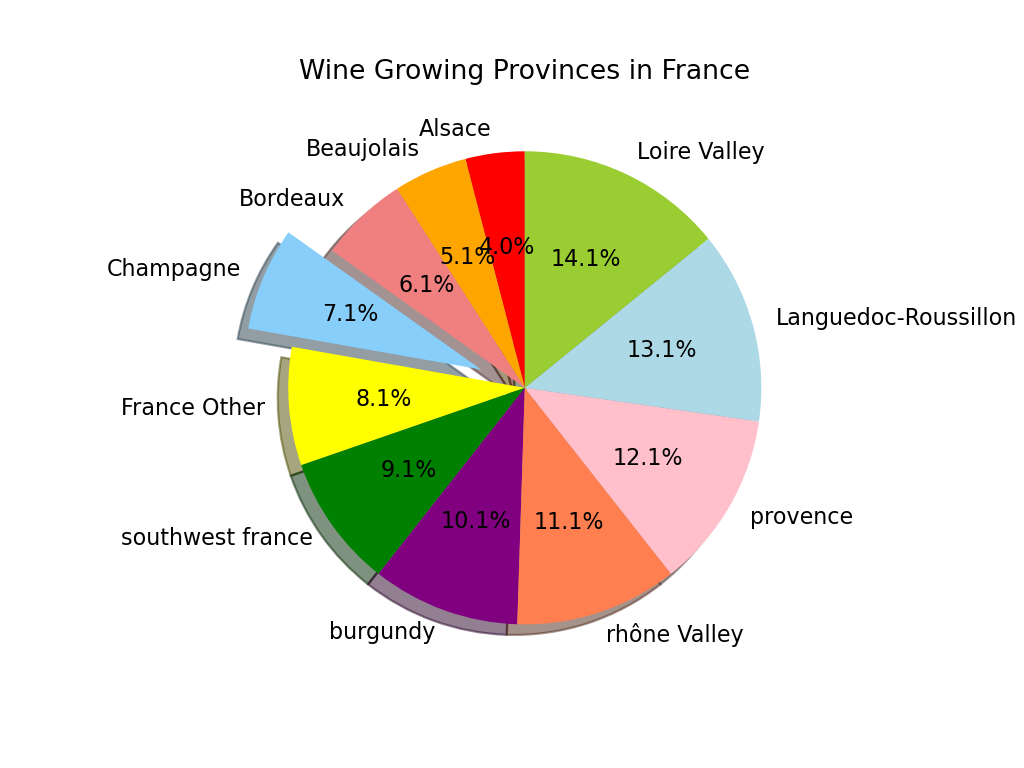

In [15]:
plt.figure(2)
plt.title("Wine Growing Provinces in France")
plt.pie(points, explode=explode, labels=france, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis=("equal")
plt.show()

In [16]:
#create a pie chart reflecting provinces with italy

# list of provinces in Italy
italy = ["Sicily & Sardinia","Central Italy", "Tuscany", "Piedmont", "Northeastern Italy","Veneto","Italy Other", "Lombardy", "Northwestern Italy", "Southwestern Italy"]
# The values of each section of the pie chart
points = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue","yellow","purple","coral", "pink","lightblue", "yellowgreen"]

explode = (0, 0, 0, 0.3, 0, 0, 0, 0, 0, 0,)         

<IPython.core.display.Javascript object>


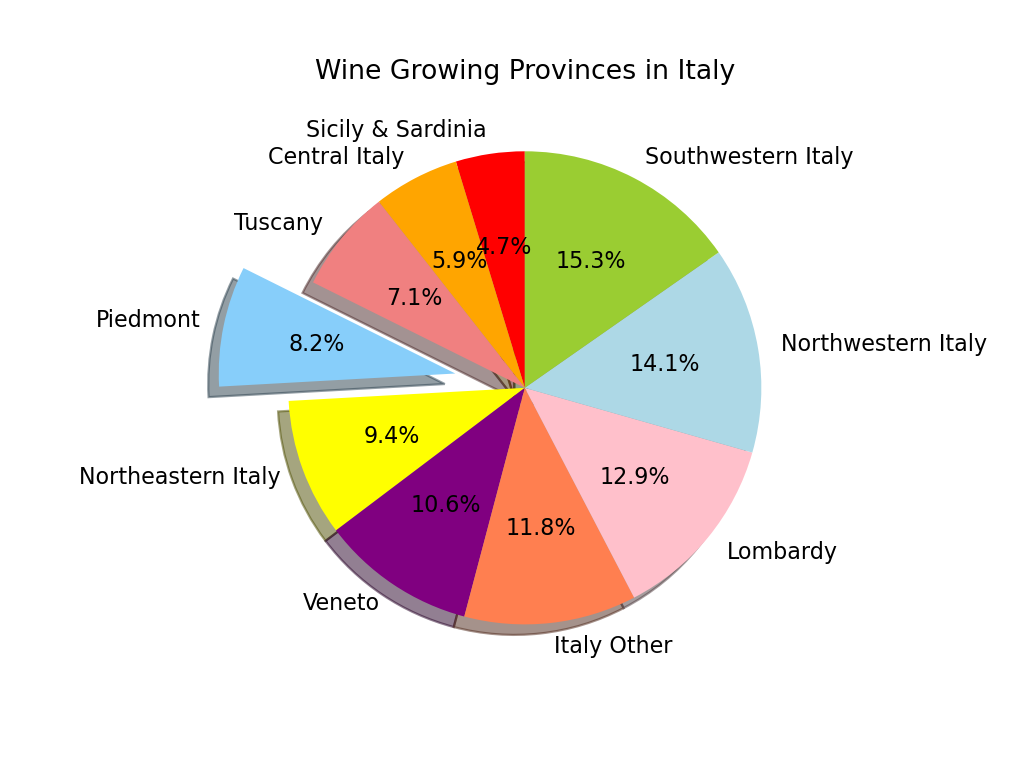

In [17]:
plt.figure(3)
plt.title("Wine Growing Provinces in Italy")
plt.pie(points, explode=explode, labels=italy, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis=("equal")
plt.show()

In [18]:
#create a pie chart for reflecting provinces in Spain
# list of provinces in spain

spain = ["Central Spain", "northern Spain", "Catalonia","Spain Other","Levante", "Galicia","Andalucia","Spanish Islands"]

 # The values of each section of the pie chart
points = [20, 30, 40, 45, 50, 55, 60, 65]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue","yellow","purple","coral", "pink"]

explode = (0, 0, 0, 0, 0, 0, 0, 0.1)         

<IPython.core.display.Javascript object>


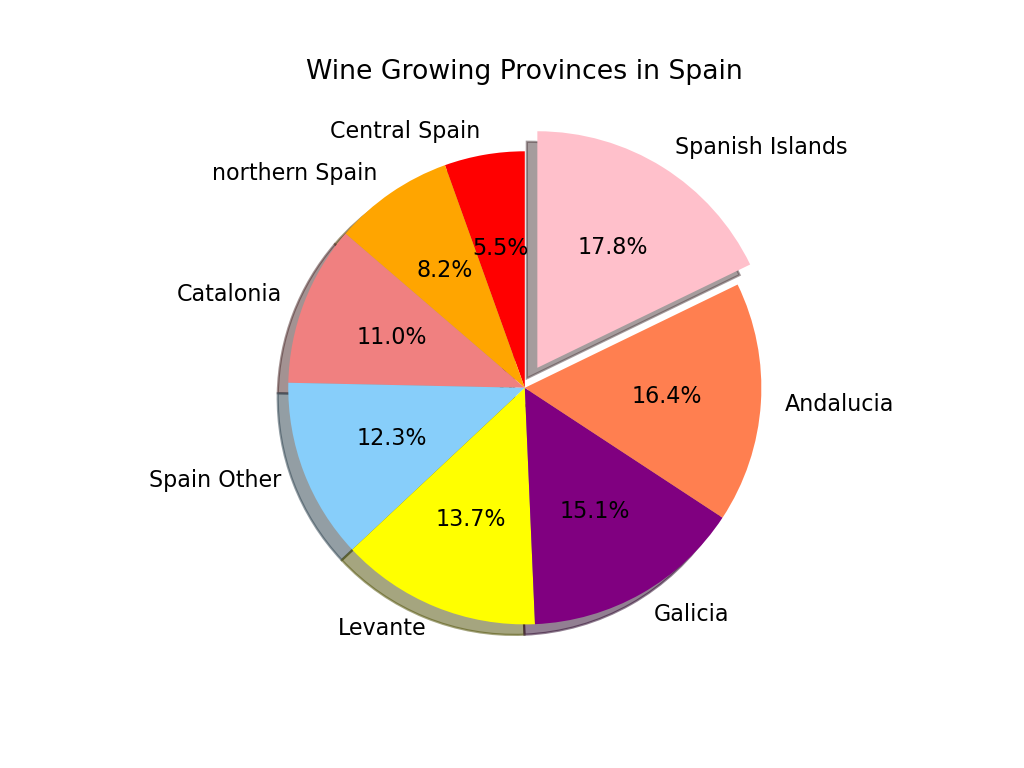

In [19]:
plt.figure(4)
plt.title("Wine Growing Provinces in Spain")
plt.pie(points, explode=explode, labels=spain, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis=("equal")
plt.show()

In [20]:
#create a pie chart listing wine growing provinces in argentina
argentina = ["Mendoza Province", "Other"]
# The values of each section of the pie chart
points = [ 45, 60]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

explode = (0, 0)   

<IPython.core.display.Javascript object>


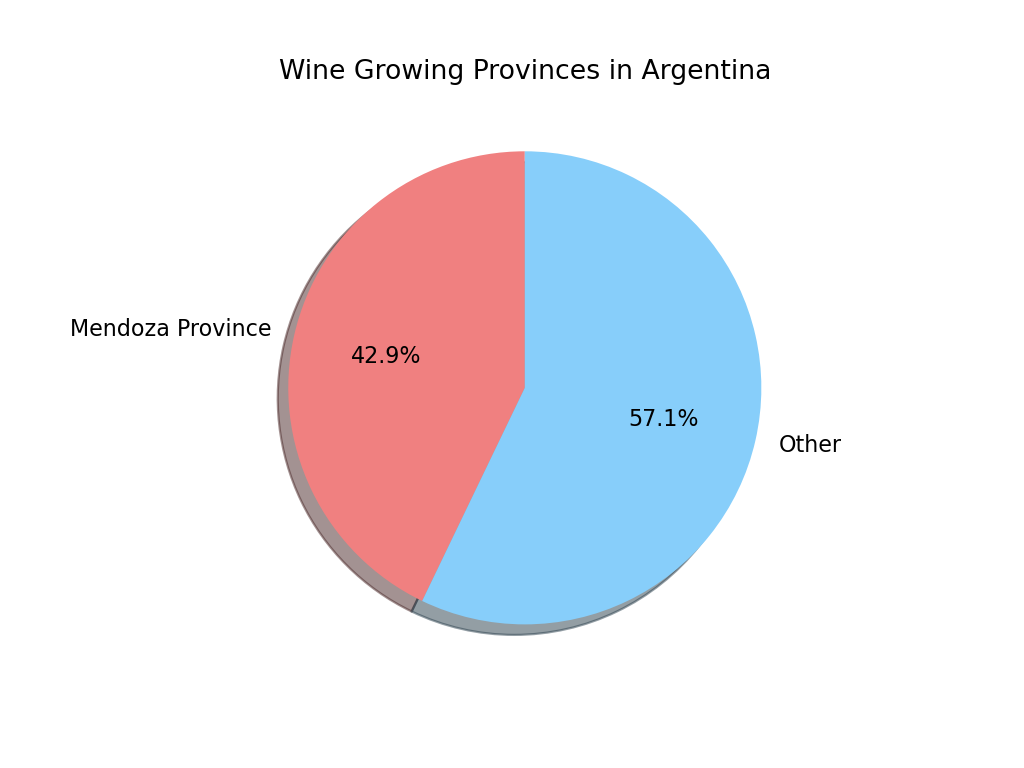

In [21]:
plt.figure(5)
plt.title("Wine Growing Provinces in Argentina")
plt.pie(points, explode=explode, labels=argentina, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis=("equal")
plt.show()

In [22]:
#create a pie chart listing wine growing provinces in Canada
Canada = ["Ontario","Bristish Columbia", "Other"]
# The values of each section of the pie chart
points = [ 30, 45, 60]

# The colors of each section of the pie chart
colors = ["Red","Yellow","Blue"]

explode = (0, 0, 0.1)   

<IPython.core.display.Javascript object>


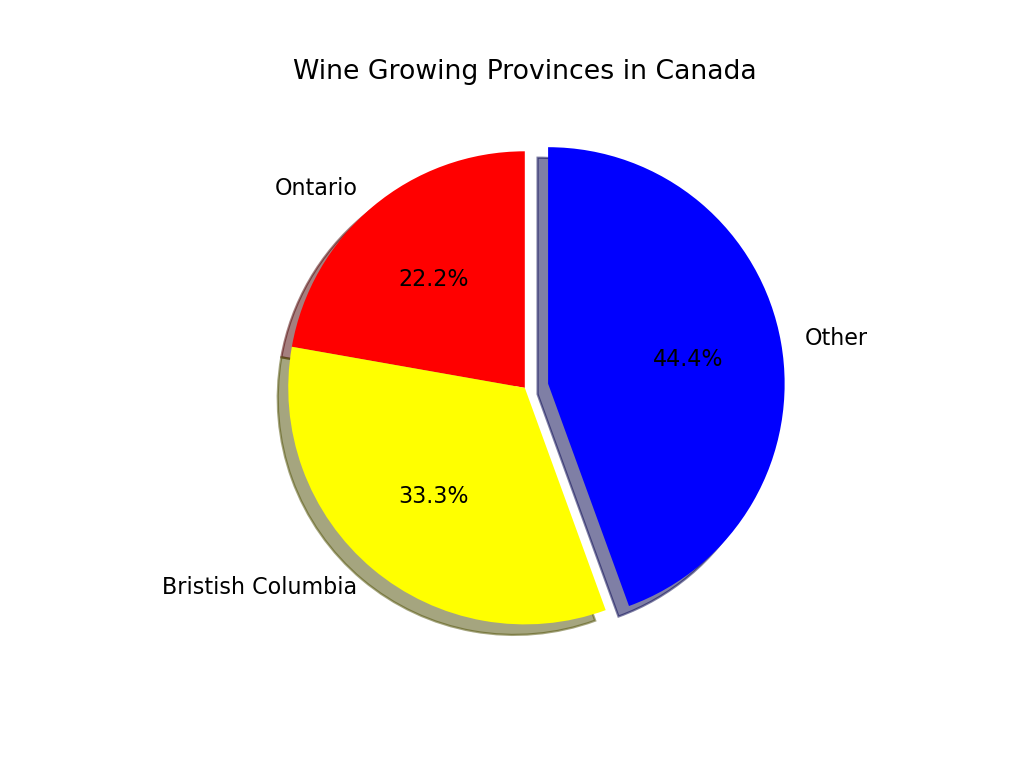

In [24]:
plt.figure(6)
plt.title("Wine Growing Provinces in Canada")
plt.pie(points, explode=explode, labels=Canada, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis=("equal")
plt.show()

In [27]:
# create a pie chart reflecting wine growing provinces in Australia

Australia = ["Victoria","South Australia", "Western Australia","Tasmania", "New South Wales", "Australia Other"]
# The values of each section of the pie chart
points = [ 30, 45, 60, 65, 70, 80]

# The colors of each section of the pie chart
colors = ["Red","Yellow","Blue","Orange","Green","Purple"]

explode = (0.1,0,0,0,0,0)

<IPython.core.display.Javascript object>


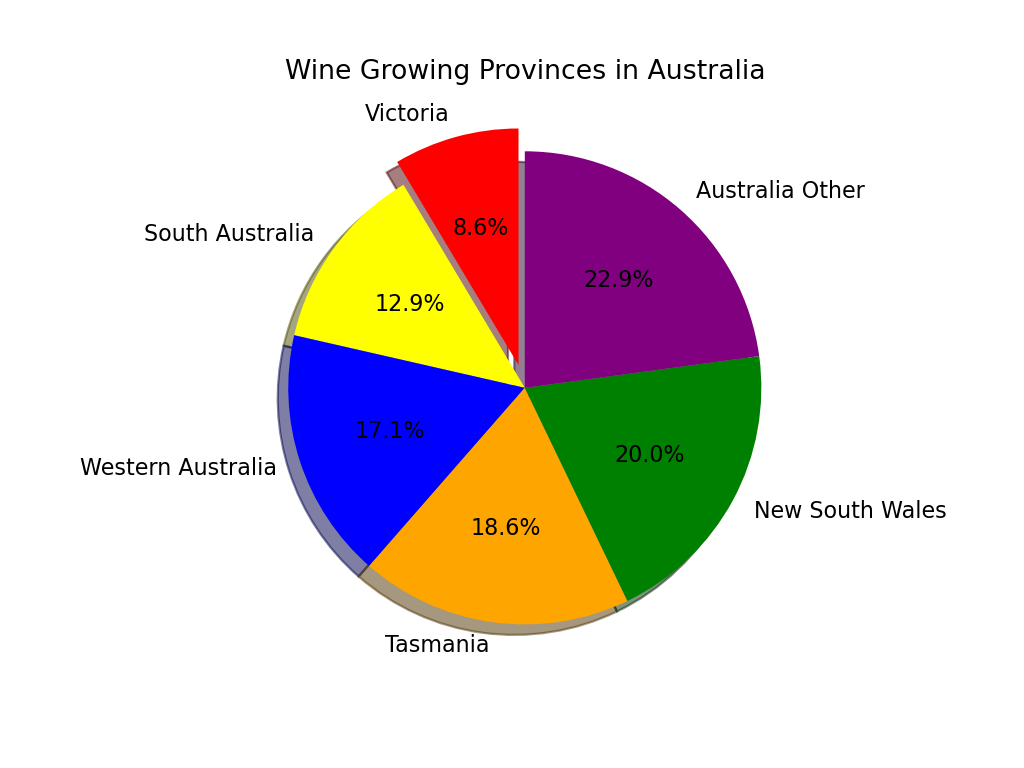

In [28]:
plt.figure(7)
plt.title("Wine Growing Provinces in Australia")
plt.pie(points, explode=explode, labels=Australia, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis=("equal")
plt.show()

In [62]:
#create a bar chart relecting wine growing states in US

US = ["MI", "OR", "VA","WA","NY", "ID", "TX", "PA","NJ", "NM", "NV", "COL", "AZ","MO","MA", "IL","OH","NC","VT","KY","CT","IA","RI","Hawaii","California"]
# The values of each section of the pie chart
points = [ 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 100,105, 120, 130, 150, 175, 200, 225, 250, 275, 290,300]
# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue","yellow","green","purple","coral", "pink","lightblue", "yellowgreen"]

explode = (0.2,0,0.1,0.2,0,0,0.2,0,0,0.1,0,0,0.2,0,0,0.1,0,0,0,0.1,0,0,0,0,0.3)

<IPython.core.display.Javascript object>


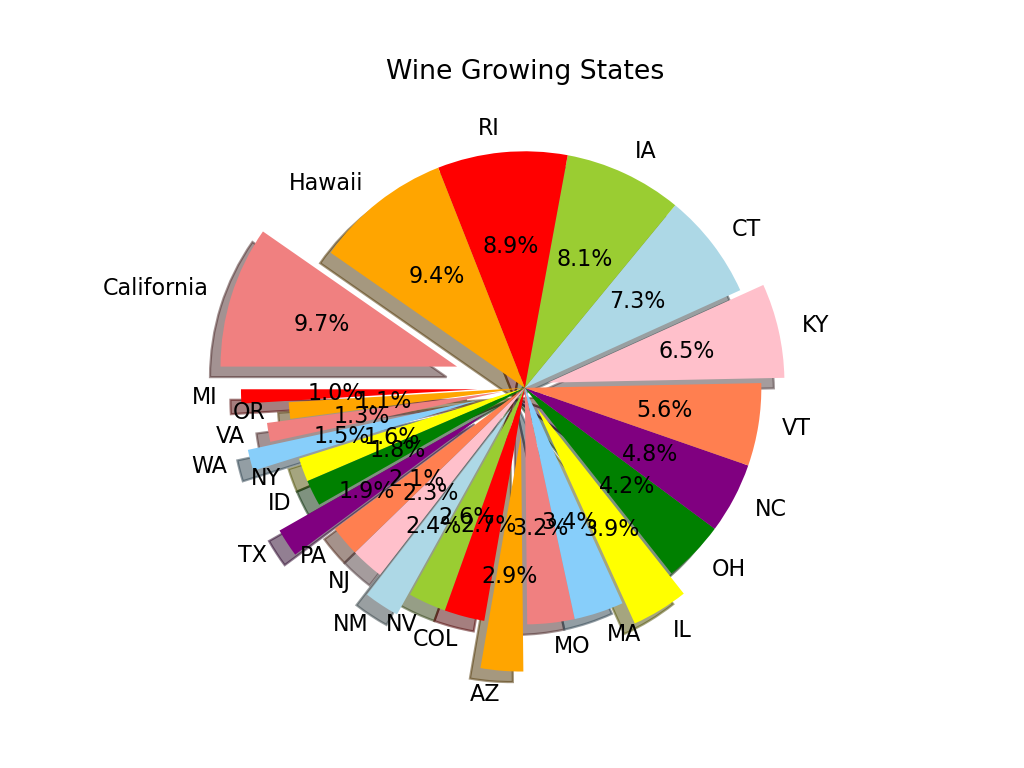

In [63]:
plt.figure(8)
plt.title("Wine Growing States")
plt.pie(points, explode=explode, labels=US, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis=("equal")
plt.show()